In [39]:
import pandas as pd

In [32]:
from iexfinance import Stock
tsla = Stock('AAPL')
tsla.get_open()
tsla.get_price()

222.73

In [30]:
from iexfinance import get_historical_data
from datetime import datetime

start = datetime(2015, 1, 1)  #month, day
end = datetime(2018, 1, 1)

df = get_historical_data("AAPL", start=start, end=end, output_format='pandas')['close']
df.head()

date
2015-01-02    102.3192
2015-01-05     99.4367
2015-01-06     99.4461
2015-01-07    100.8406
2015-01-08    104.7151
Name: close, dtype: float64

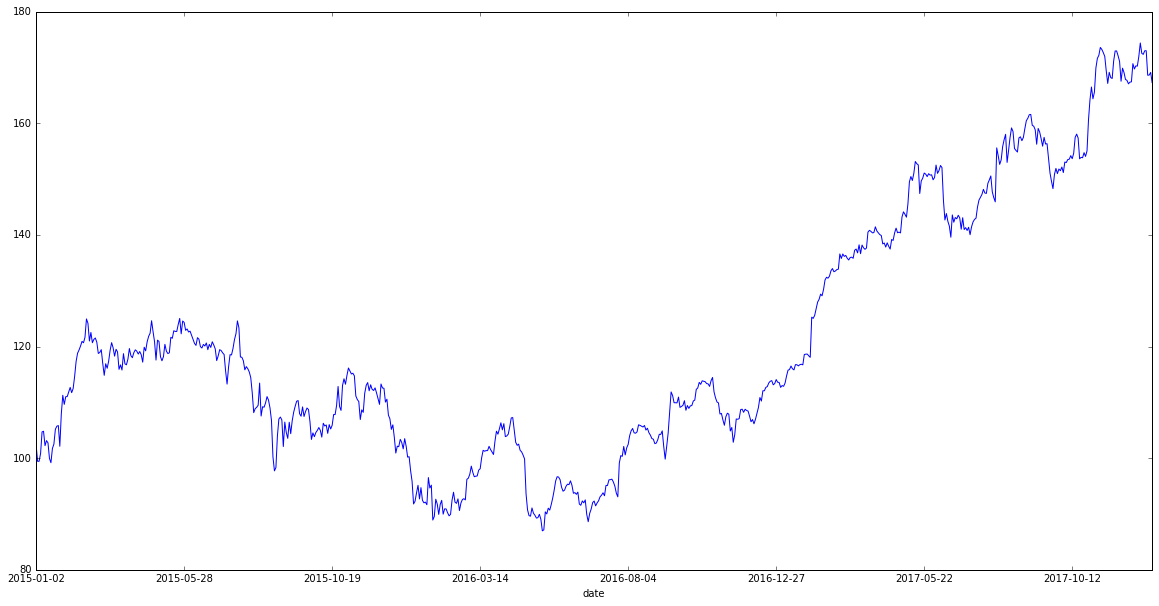

None


In [31]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
df.plot()
print(plt.show())

In [33]:
# https://www.alphavantage.co/
alpha_api = 'DX33NWHEF3UT1B3S'


In [34]:
import urllib.request
import json
import os

#https://github.com/aknakshay/stockmarketanalysis/blob/master/PullData/NASDAQ.py
#https://www.cloudsigma.com/nasdaq-per-minute-data-using-python/

def import_web(ticker):
    """
    :param identifier: List, Takes the company name
    :return:displays companies records per minute
    """
    url = 'https://www.alphavantage.co/query?function=TIME_SERIES_&symbol='+ticker +'&interval=1min&apikey=' + alpha_api + '&outputsize=full&datatype=json'
    fp = urllib.request.urlopen(url)
    mybytes = fp.read()
    mystr = mybytes.decode("utf8")
    fp.close()
    return mystr


def get_value(ticker):
    js = import_web(ticker)
    parsed_data = json.loads(js) # loads the json and converts the json string into dictionary
    ps = parsed_data['Time Series (1min)']
    partitionSave(ps,ticker)

            
def partitionSave(ps,ticker):
    date = {}
    for i in ps:
        date[i[:10]] = "date"
    for d in date.keys():
        tmp = {}
        for i in ps:
            if(i[:10] == d):
                tmp[i] = ps[i]
        if(os.path.isdir(d) == False):
            os.mkdir(d)
        fname = ticker + "_dann"
        try:
            with open(os.path.join(d,fname),'r') as f:
                t = json.load(f)
                for i in t:
                    tmp[i]=t[i]
        except Exception as e:
            pass
                
        with open(os.path.join(d,fname), 'w') as f:
            json.dump(tmp, f)
                
def main():
    #Start Process
    company_list = ['GOOGL','MSFT','ORCL','FB','AAPL','TSLA'];
    try:
        for company in company_list:
            print("Starting with " + company)
            get_value(company)
            print("Ended Writing Data of " + company)
    except Exception as e:
        print(e)

main()

Starting with GOOGL
Ended Writing Data of GOOGL
Starting with MSFT
Ended Writing Data of MSFT
Starting with ORCL
Ended Writing Data of ORCL
Starting with FB
Ended Writing Data of FB
Starting with AAPL
Ended Writing Data of AAPL
Starting with TSLA
Ended Writing Data of TSLA


In [36]:
data = import_web('AAPL')

In [38]:
parsed_data = json.loads(data)

In [41]:
df = pd.DataFrame(parsed_data)

In [43]:
df

,Meta Data,Time Series (1min)
1. Information,"Intraday (1min) open, high, low, close prices ...",NaN
2. Symbol,AAPL,NaN
2018-10-17 09:31:00,NaN,"{'5. volume': '705081', '3. low': '222.1500', ..."
2018-10-17 09:32:00,NaN,"{'5. volume': '145291', '3. low': '222.0500', ..."
2018-10-17 09:33:00,NaN,"{'5. volume': '110592', '3. low': '222.0000', ..."
2018-10-17 09:34:00,NaN,"{'5. volume': '101935', '3. low': '222.0000', ..."
2018-10-17 09:35:00,NaN,"{'5. volume': '102271', '3. low': '222.0200', ..."
2018-10-17 09:36:00,NaN,"{'5. volume': '104407', '3. low': '221.9500', ..."
2018-10-17 09:37:00,NaN,"{'5. volume': '131670', '3. low': '222.0200', ..."
2018-10-17 09:38:00,NaN,"{'5. volume': '150896', '3. low': '221.8590', ..."
